# Principal Component Analysis 

Principal component analysis (PCA) is an important dimensionality reduction technique which you will find in many textbooks. Starting with a data set of $m$ observations with $n$ features, the task of PCA is to find a data set with less features $d < n$ which keeps as much information and structure as possible, but looses as much redundancy as possible. The technique to solve this task is given by linear algebra techniques, i.e., singular value and eigenvalue decomposition, respectively. In my opinion, it is interesting to understand the concept of PCA from two perspectives. (1) **principal components** are axes along variance of the data, (2) principal components minimize the **reproduction error**. 

## Principal components are eigenvectors

Let us first take a look at the first way. Assume we start with a data set containing of two features as shown below. We observe, both variables seem to exhibit high dependencies which indicates high redundancy. Spoken more easily, if we know the observation of $X_1$, we are almost sure about the value of $X_2$ such that $X_2$ does not provide that much of new information. Assuming linear dependence, the degree of redundancy is strictly related to **covariance** or in a more standardized form to **correlation**.

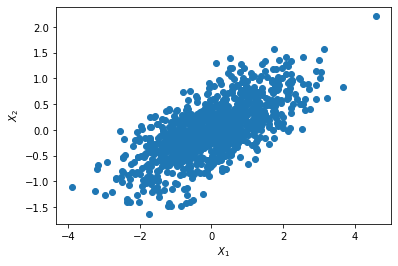

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
x1 = np.random.normal(size = 1000)
x2 = 0.5 * x1 + 0.5 * np.random.normal(size = 1000)

X = np.column_stack((1.2 * x1, 0.8 * x2))

scaler = StandardScaler(with_std = False)
scaler.fit(X)

X = scaler.transform(X)


plt.scatter(X[:, 0], X[:, 1])
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

So let us determine the covariance matrix for the data from above.

In [2]:
import numpy as np
cov_mat = np.cov(X.T)
print(cov_mat)

[[1.38076395 0.44131409]
 [0.44131409 0.29997762]]


On the diagonal, you can observe variances for $X_1, X_2$ and covariance is given by the off-diagonal element. Principal components can be interpreted as axes which account for the highest amount of variance in the data by decreasing order. So take a look at the figure above. It seems, a higher degree of variability is given by $X_1$. Its observations are approximately in the range $[-4.5, 4.5]$, while values for $X_2$ are in the range $[-2.5, 2.5]$. This information is also revealed by the covariance matrix, exhibiting an estimated variance of $1.38$ for $X_1$ and $0.30$ for $X_2$. Now, assume you should draw one line along the highest variability of the blue dots. Something as can be seen in the figure below may result.

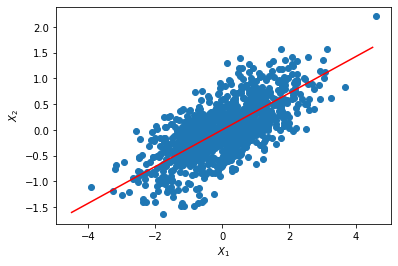

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X)
coeff = pca.components_.T
slope = coeff[1,0] / coeff[0, 0]
#slope2 = coeff[0,1] / coeff[1, 1]

plt.scatter(X[:, 0], X[:, 1])
plt.plot(np.linspace(-4.5, 4.5), np.linspace(-4.5, 4.5) * slope, color = 'red')
#plt.plot(np.linspace(-4.5, 4.5), np.linspace(-4.5, 4.5) * slope2, color = 'red')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.show()

This is what is meant by "the axis which accounts for the highest variability" and is a possibility to visualize the first principal component. But how is this related to eigenvalues? Assume we draw a vector starting from the origin in the scatter plot. It can be any random vector, in the figure below, we choose $\boldsymbol{x} = (-1.5, 2)^T$.

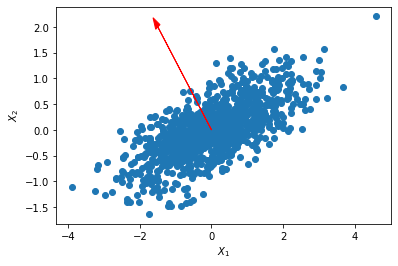

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')

start_vec = [-1.5, 2]
plt.arrow(0, 0, start_vec[0], start_vec[1], color = 'red', head_width = 0.15)
plt.show()

Now, if we multiply the covariance matrix of $X_1$ and $X_2$ with this vector, take a look what happens:

$$
\begin{pmatrix}
1.38 & 0.44 \\
0.44 & 0.30 \\
\end{pmatrix}
\begin{pmatrix}
-1.50  \\
 2.00  \\
\end{pmatrix}
=
\begin{pmatrix}
-1.19  \\
-0.06  \\
\end{pmatrix}
$$

A new vector is generated which is drawn into the direction of the highest variance. This can be seen in the figure below.

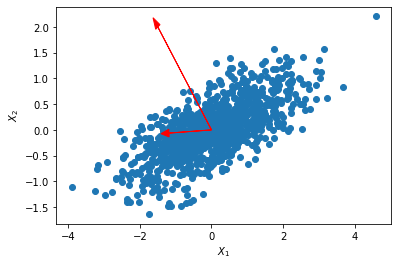

In [5]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')

start_vec = [-1.5, 2]
plt.arrow(0, 0, start_vec[0], start_vec[1], color = 'red', head_width = 0.15)

for i in range(1):
    start_vec = cov_mat.dot(start_vec)
    plt.arrow(0, 0, start_vec[0], start_vec[1], color = 'red', head_width = 0.15)
    
plt.show()

If we repeat this step a few times, you can observe that the vector gets more and more drawn into the direction of the axis along the highest variability. While the direction of the vector seems not to change anymore after a few multiplications, the vector itself just gets longer and longer by repeatedly multiplying itself with the covariance matrix. One last time, observe this in the figure below.

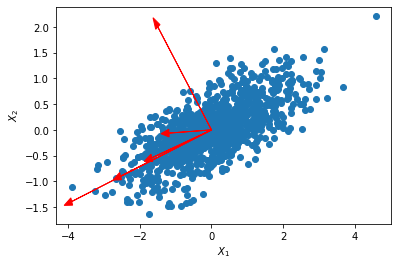

In [6]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')

start_vec = [-1.5, 2]
plt.arrow(0, 0, start_vec[0], start_vec[1], color = 'red', head_width = 0.15)

for i in range(4):
    start_vec = cov_mat.dot(start_vec)
    plt.arrow(0, 0, start_vec[0], start_vec[1], color = 'red', head_width = 0.15)
    
plt.show()

The behavior from above is exactly what eigenvectors are. Recall the definition: the eigen decomposition of a square matrix $\boldsymbol{A} \in \mathbb{R}^{n \times n}$ depends on **eigenvalues** and **eigenvectors** of if. If a number $\lambda \in \mathbb{R}$ exists such that:

$$ \boldsymbol{A} \boldsymbol{x} = \lambda \boldsymbol{x} $$

then we call $\lambda$ eigenvalue and $\boldsymbol{x} \in \mathbb{R}^n$ the eigenvector. In our case, $\boldsymbol{A}$ represents the covariance matrix and our interest lies in the identification $\boldsymbol{x}$. The eigen decomposition states that multiplying a matrix with the vector $\boldsymbol{x}$ is the same as scaling the vector $\boldsymbol{x}$ by some scaling factor $\lambda$. By means of scaling, only the length of the vector is changed, but the direction stays the same.

Subsuming, the (first) principal component is the axis which captures most of the variability of the data. Multiplying some vector with the covariance matrix draws it into the direction with the highest variability. Once the vector is drawn along the direction of the highest variability, it only changes its length if we keep on multiplying it with the covariance matrix. This is equivalent with finding an eigenvector of the covariance matrix and this is why principal components are eigenvectors. So far, we have only looked at the first principal component. The second principal component is the axis which captures the most variability after the first principal component. In general, in $\mathbb{R}^{n \times n}$, we have a maximum of $n$ eigenvalues with $n$ eigenvectors. For the latter to be true, we must add that we normalize eigenvectors to reach a unique representation. The eigenvector associated with the highest eigenvalue is the principal component related to the highest variability, the eigenvector associated with the second highest eigenvalue is the principal component related to the second highest variability and so on. Another useful property which can be deduced from eigenvalues is the **ratio of variability explained** by the principal component. Dividing the eigenvalue through the sum of all eigenvalues delivers us this information.

Furthermore, principal components are orthogonal, which means independent and standing right-angled onto each other. Moreover, due to normalization they are orthonormal, exhibiting a norm (vector length) equal to one. Please also note, that data is assume to be mean-standardized, which means each features is shifted by its mean or the estimate, respectively, $(x_{ij} - \bar{x}_j)$.

This is all pretty technical, but what you should notice and remind is that principal components help to reduce the dimensionality and keep as much information and structure as possible. How can we reduce the dimensionality? Once, principal components are found, they can be used to project data into lower dimensional spaces. For instance, in our example, we are in two dimensional space. The following code can be used to derive the principal components.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X)

#the first row represents the first principal component, the second row the second principal component
pca.components_

array([[ 0.94194932,  0.33575509],
       [-0.33575509,  0.94194932]])

To project two dimensional space into one dimensional space, we multiply each row in the data set with the first principal component $\boldsymbol{p}_1 \in \mathbb{R}^{2 \times 1}$.

$$
\boldsymbol{z} = \boldsymbol{X} \boldsymbol{p}_1
$$

In [8]:
z = X.dot(pca.components_[0])
print('The first five observations from the one dimensional projection are:')
print(z[:5])

The first five observations from the one dimensional projection are:
[ 0.78213991 -0.08463611  0.79314054  1.80523984 -0.23630876]


To better understand what is meant by keeping as much information and structure as possible, take a look at the figure below. In the left you can see the original data in two dimensional space. Three arbitrary observations are marked by color points. In the right, you can see the one dimensional projection with the corresponding marked points. While the location of the points is somewhere else, the fact that the purple and black point are closer to each other than to the green point in two dimensions is kept in one dimension as well. 

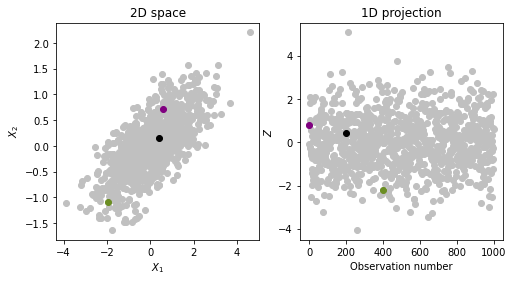

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))

ax1.scatter(X[:, 0], X[:, 1], color = 'silver')
ax1.scatter(X[0, 0], X[0, 1], color = 'purple')
ax1.scatter(X[200, 0], X[200, 1], color = 'black')
ax1.scatter(X[400, 0], X[400, 1], color = 'olivedrab')
ax1.set_xlabel(r'$X_1$')
ax1.set_ylabel(r'$X_2$')
ax1.set_title('2D space')

ax2.scatter(np.arange(0, len(z)), z, color = 'silver')
ax2.scatter(0, z[0], color = 'purple')
ax2.scatter(200, z[200], color = 'black')
ax2.scatter(400, z[400], color = 'olivedrab')
ax2.set_xlabel('Observation number')
ax2.set_ylabel(r'$Z$')
ax2.set_title('1D projection')

plt.show()

But how many principal components should we use in practice? Or, to which dimension should we project the original data. As principal components aim to retain and by this way explain variability in the data, the ratio of explained variance is used for answering these questions. If we use the scipy package for PCA, we can retrieve this information in the following way.

In [10]:
pca.explained_variance_ratio_

array([0.91511337, 0.08488663])

You can see, for our example approximately $91.5%$ of the overall variability in the data is explained by the first principal component. In real life applications, we will work with a multitude of features. In practice, one uses the number of principal components, such that a certain ratio of explained variability is exceeded. Typical values are $0.90$ or $0.95$.

## PCA is equivalent to autoencoders

So far, you did not hear anything about autoencoders. While their general functionality is beyond the scope of PCA, a special form of autoencoder is nearly the same as PCA. In my opinion, the idea of dimensionality reduction is easier to understand in this way. At the beginning of this chapter, I already wrote, that we can understand the concept or PCA by minimizing the reproduction error without explaining what this is. 

Imagine, we want to reduce the two dimensional data set from our example into a one dimensional data set, but with the condition that the one dimensional data set keeps as much information from the original data set as possible. With other words, the variable from the one dimensional data set is supposed to know as much as possible about variables in the original data set. Let us define a composition $g \circ f: \mathbb{R}^2 \to \mathbb{R}^2$ of two linear (or affine) functions $f: \mathbb{R}^2 \to \mathbb{R}$, $f: \mathbb{R} \to \mathbb{R}^2$ with:

$$
f(\boldsymbol{x}_i) = \boldsymbol{x}_i^T \boldsymbol{w}_f = x_{i1} w_{1f} + x_{i2} w_{2f} = z_i
$$

$$
g(z_i) = z_i \boldsymbol{w}_g^T = z_i w_{1g} + z_i w_{2g}
$$

and finally, the composition:

$$
g \circ f(\boldsymbol{x}_i) =  \boldsymbol{x}_i^T \boldsymbol{w}_f \boldsymbol{w}_g^T = \boldsymbol{\hat{x}}_i
$$

The reproduction error for an observation is given by $|| \boldsymbol{x}_i - \boldsymbol{\hat{x}}_i ||_2^2$. And for all observation, the average reproduction error is:

$$
\frac{1}{m} \sum_i || \boldsymbol{x}_i - \boldsymbol{\hat{x}}_i ||_2^2
$$

Minimizing this reproduction error leads to a variable $Z$ which best explains the variation in the original data $\boldsymbol{X}$. Generalizing this into arbitrary dimensions leads to a **linear autoencoder**. An autoencoder consists of an encoder and a decoder. The encoder is the function $f$ in our example, and, the decoder is given by $g$. Basically, the encoder projects data to the lower dimensional space and the decoder projects it back. However, as long as lower dimensions are used than provided by input space, a perfect recreation of the original data is not possible which causes a reproduction error. But, by minimizing this error, most relevant information in the original data is transmitted by $Z$. By construction, linear autoencoders are neural networks. While for supervised learning problems, the output layer was used and exhibited a dimensionality equal to the one of the target variable, we define three layers in case of the linear autoencoder. The input and output layer must exhibit identical dimensionality as, the degree of dimensionality reduction is defined by the number of neurons in the hidden layer. An illustration for our example is given below:

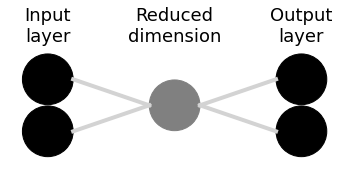

In [11]:
from nnv import NNV
import matplotlib.pylab as plt
layersList = [
    {"title":"Input\nlayer", "units": 2, "color": "black"},
    {"title":"Reduced\ndimension", "units": 1},
    {"title":"Output\nlayer", "units": 2,"color": "black"},
]

NNV(layersList).render()
plt.show()

As autoencoders are a form of neural networks, we can use the tensorflow library to define and estimating. Convince yourself with the code below, that this task is rather easy.

In [12]:
import tensorflow as tf

#to make it clear we first define the encoder as one layer with 2D input and 1D output
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'linear', input_shape = [2], use_bias = False)
])

#the 1D output from the encoder is fed to the decoder which projects it back to 2D
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation = 'linear', input_shape = [1], use_bias = False)
])

#the overall autoenoder combines encoding and decoding
autoencoder = tf.keras.Sequential([encoder, decoder])

#as we know it from supervised learning, we compile the model
#defining the mean squared error to minimize reproduction error
autoencoder.compile(loss = 'mse', optimizer = 'adam')

#fit the model
autoencoder.fit(X, X, epochs = 50, verbose = 0)

print('Weights of the encoder:')
print(autoencoder.weights[0].numpy())
print('')
print('Weights of the decoder:')
print(autoencoder.weights[1].numpy())

#with estimated weights, the hidden neurons from the encoder are the 1D projections
z = encoder.predict(X)

Weights of the encoder:
[[-0.6463758 ]
 [-0.03883169]]

Weights of the decoder:
[[-1.5256469  -0.48859298]]


As for PCA, we can compare the original representation and its one dimensional projection. In the Figure below, you can see that this is nearly identical to what we have seen for the PCA.

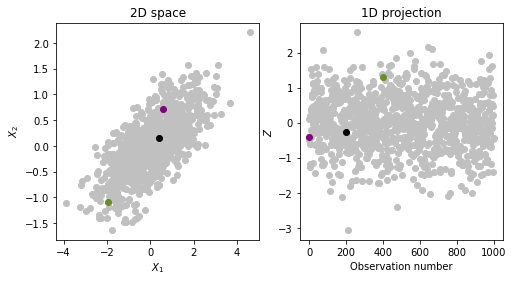

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))

ax1.scatter(X[:, 0], X[:, 1], color = 'silver')
ax1.scatter(X[0, 0], X[0, 1], color = 'purple')
ax1.scatter(X[200, 0], X[200, 1], color = 'black')
ax1.scatter(X[400, 0], X[400, 1], color = 'olivedrab')
ax1.set_xlabel(r'$X_1$')
ax1.set_ylabel(r'$X_2$')
ax1.set_title('2D space')

ax2.scatter(np.arange(0, len(z)), z, color = 'silver')
ax2.scatter(0, z[0], color = 'purple')
ax2.scatter(200, z[200], color = 'black')
ax2.scatter(400, z[400], color = 'olivedrab')
ax2.set_xlabel('Observation number')
ax2.set_ylabel(r'$Z$')
ax2.set_title('1D projection')

plt.show()

What are the differences between linear autoencoders and PCA? For PCA, usually, all principal components are derived first and the amount of components to use is chosen according to the ratio of explained variability. For the linear autoencoder, we must decide the dimensionality reduction up front and estimate different models, if we want to change this dimensionality. Furthermore, principal components are orthonormal. No such requirements are not made for the weights of the autoencoder. 

As long as we only use three layers and linear activation functions, autoencoders are equivalent to PCA. Generalizing our example, the linear autoencoder is a composition $g \circ f: \mathbb{R}^n \to \mathbb{R}^n$ of two linear functions $f: \mathbb{R}^n \to \mathbb{R}^d$, $f: \mathbb{R}^d \to \mathbb{R}^n$ with weights $\boldsymbol{W}_f \in \mathbb{R}^{n \times d}, \boldsymbol{W}_g \in \mathbb{R}^{d \times n}$. The weights are derived by minimization:

$$
\left(\boldsymbol{\hat{W}}_f , \boldsymbol{\hat{W}}_g \right) = \arg \min_\limits{\boldsymbol{W}_f, \boldsymbol{W}_g} \frac{1}{m} \sum_i || \boldsymbol{x}_i - \left( \boldsymbol{x}_i^T \cdot \boldsymbol{W}_f \cdot \boldsymbol{W}_g \right)^T  ||_2^2
$$

However, as we use neural networks, the concept of autoencoders can be made more flexible by using more layers in combination with non-linear activation functions. This is called stacked autoencoders, but is beyond the scope of the relation to PCA. The more flexible autoencoders become, the more important it is to include aspects of over fitting in the model. 

Yet, discussing autoencoders at this point is meant to make clear that dimensionality reduction can be seen as a reproduction task which tries to replicate its original data by fewer features. Furthermore, it is one example why neural networks are not exclusively valuable to supervised learning problems and can be used for unsupervised tasks as well.

## What to do with reduced dimensions

Applications of the techniques presented here are manifold. First, by reducing dimensions, we isolate redundant and useless information for methods which might follow in the analysis. This may improve supervised learning or unsupervised learning tasks which use the lower dimensional feature space. Another application is to visualize higher dimensional data. Assume, you want to illustrate observations which exhibit more then three dimensions. This is not possible without projecting the data back to two or three dimensions. A further applications which comes in my mind when treating dimensionality reduction as a reproduction problem is the multivariate identification of outliers. Reproductions for common observations are likely to be close to their original. The higher the reproduction error, the more it indicates that this observation is more distinct to typical (systematic) behavior that is represented by the latent lower dimensional projections. We will take a closer look at these applications in the case studies section.